In [2]:
import numpy as np
import torch
from torch import tensor
from torchvision.io import read_image
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import widgets
from matplotlib.widgets import Slider
import matplotlib.colors as mcolors
from fastai.vision.all import *

In [3]:
plt.rcParams['figure.figsize'] = [5, 3]

In [4]:
image_dir = '../images/'
images = [2*read_image(os.path.join(image_dir, img)).float() / 255.0 - 1 for img in os.listdir(image_dir)]

def out_sc(x):
    return ((x+1)/2).clip(0,1)

In [5]:
img = images[1][:3] # remove alpha channel

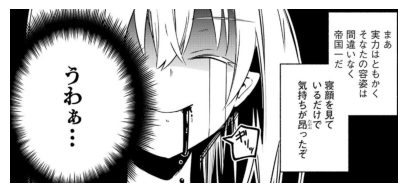

In [6]:
show_image(out_sc(img));

In [7]:
def sigma(t):
    return torch.sin(torch.pi/2*t)


def alpha(t):
    return torch.cos(torch.pi/2*t)

In [8]:
t = torch.linspace(0, 1, 10)

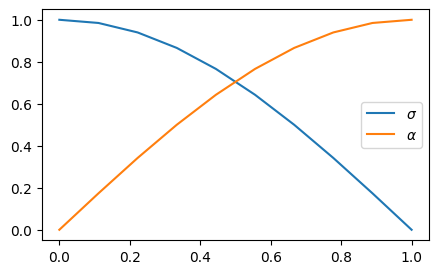

In [9]:
plt.plot(t.sort().values, reversed(sigma(t).sort().values), label=r'$\sigma$')
plt.plot(t.sort().values, alpha(t).sort().values, label=r'$\alpha$')
plt.legend()

## Noising

In [10]:
signal = img[None,] * alpha(t)[:, None, None, None] 

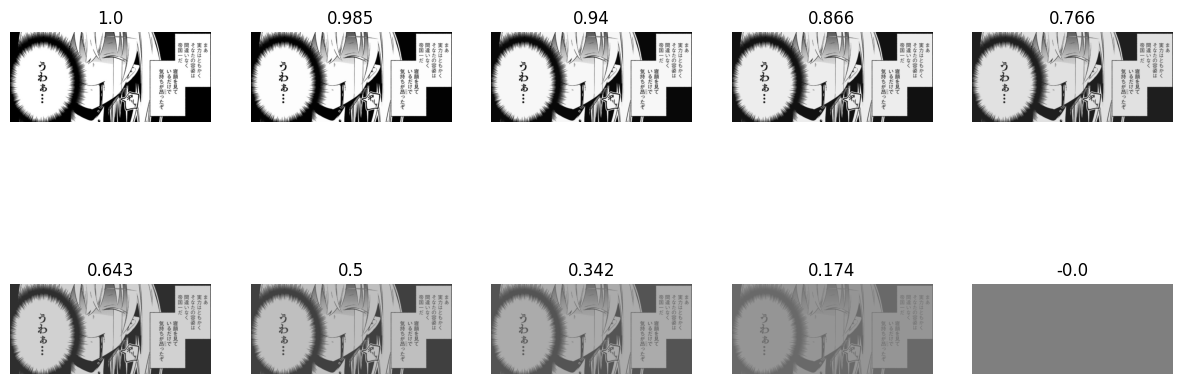

In [11]:
show_image_batch((out_sc(signal), alpha(t).numpy().round(3)), items=10, cols=5)

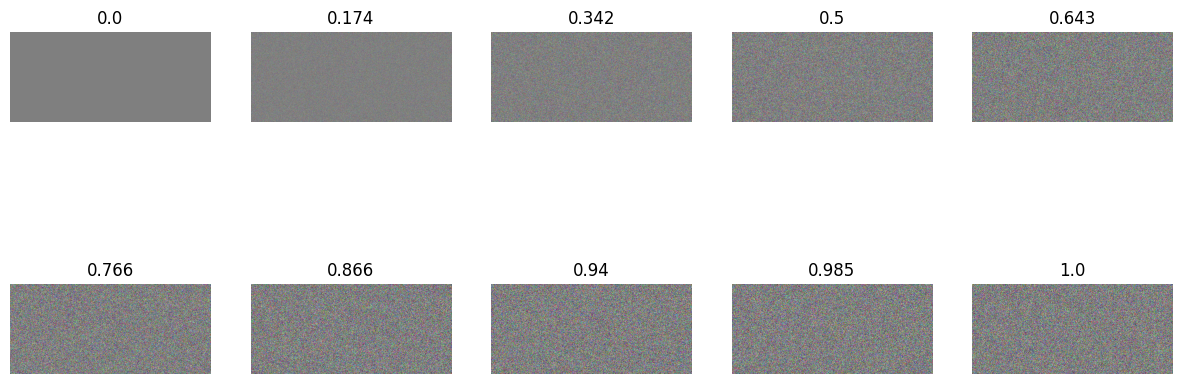

In [12]:
noise = torch.randn_like(signal) * sigma(t)[:, None, None, None]
show_image_batch((out_sc(noise), sigma(t).numpy().round(3)), items=10, cols=5);

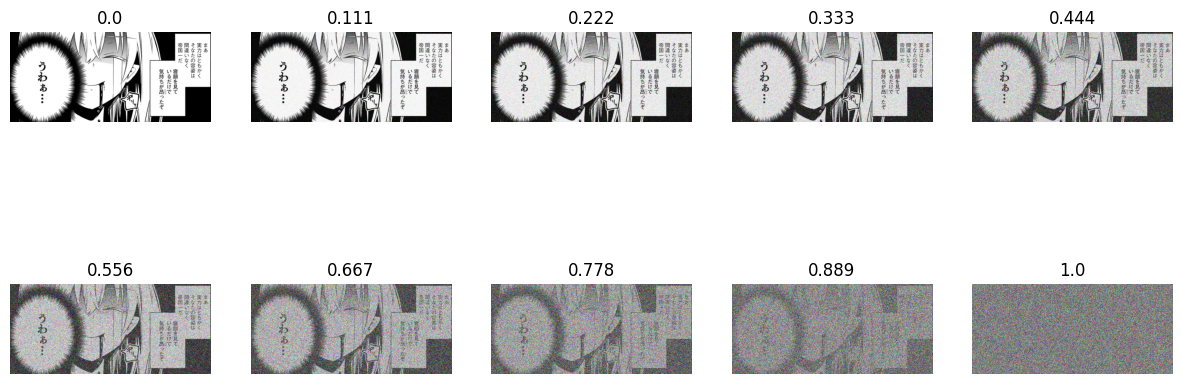

In [13]:
z = signal + noise
show_image_batch((out_sc(z), t.numpy().round(3)), items=10, cols=5);

## Lower resolution

In [14]:
import torch.nn.functional as F

z_d = F.avg_pool2d(z, kernel_size=7,stride=16,padding=1)

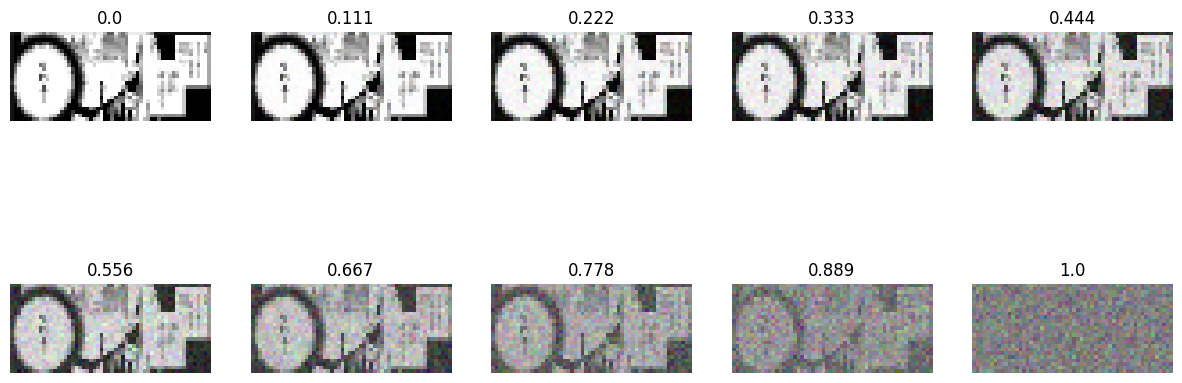

In [15]:
show_image_batch((out_sc(z_d), t.numpy().round(3)), items=10, cols=5);

### Shifted schedule

# Downsampling as noise

In [16]:
signal_d =F.avg_pool2d(signal, kernel_size=7, stride=16,padding=1)
noise_d = F.avg_pool2d(noise, kernel_size=7,stride=16,padding=1)
signal_u = F.interpolate(signal_d, scale_factor=16, mode='nearest')
noise_u = F.interpolate(noise_d, scale_factor=16, mode='nearest')

In [17]:
from torchvision import transforms as T
signal_u = T.CenterCrop(z.shape[-2:])(signal_u)
noise_u = T.CenterCrop(z.shape[-2:])(noise_u)

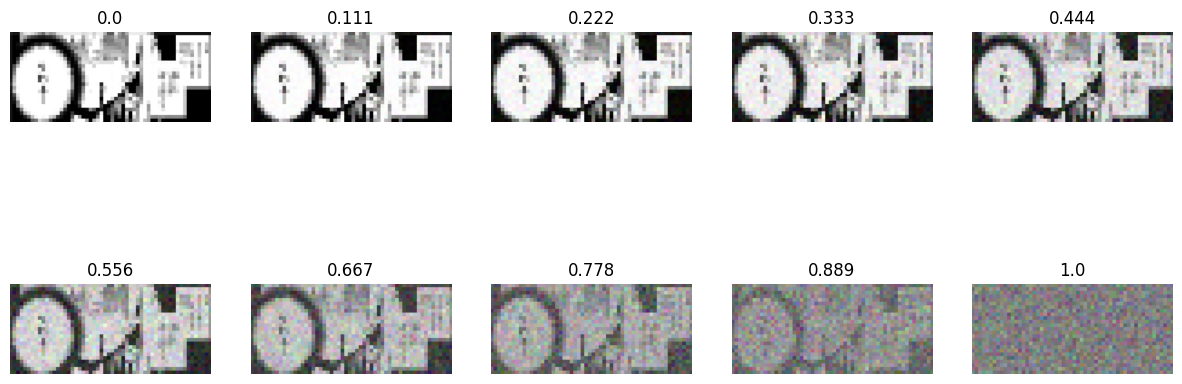

In [18]:
z_u = signal_u + noise_u
show_image_batch((out_sc(z_u), t.numpy().round(3)), items=10, cols=5);

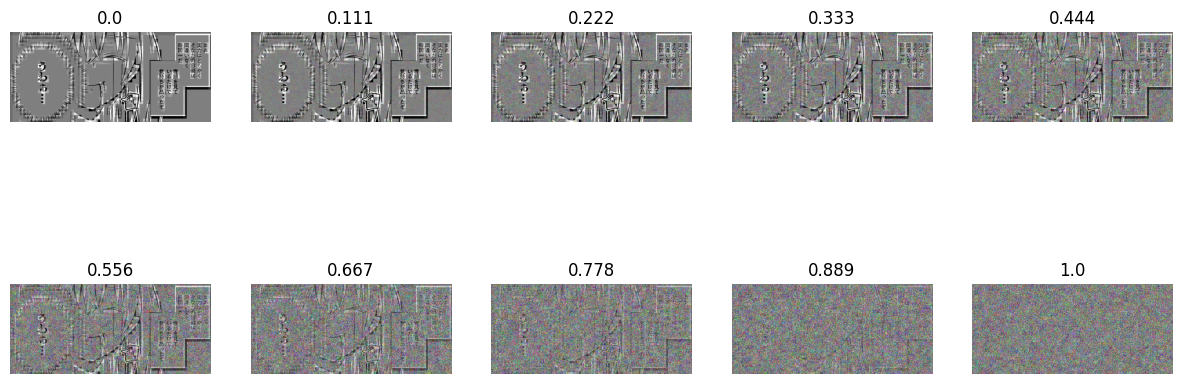

In [19]:
res = z - z_u
show_image_batch((out_sc(res), t.numpy().round(3)), items=10, cols=5);

In [20]:
scale = signal.shape[-1] / signal_d.shape[-1]
scale

15.821428571428571

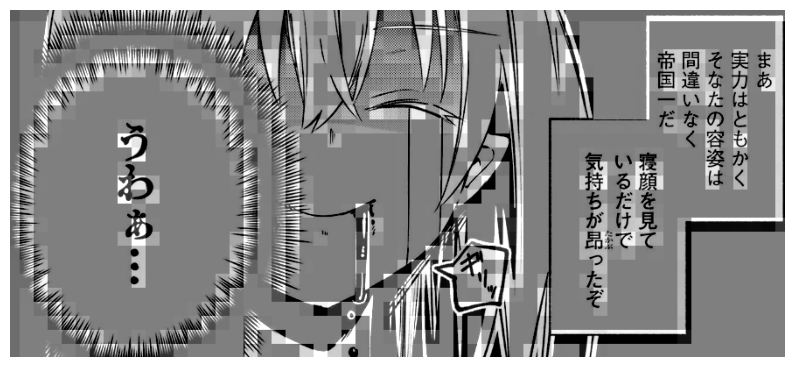

In [22]:
res = signal - signal_u
show_image(out_sc(res[0]),figsize=(10,10));

# Using shifted schedule